# Tutorial about how to use a standard Analysis class

In [1]:
from pathlib import Path

%matplotlib inline

import matplotlib.pyplot as plt

import locan as sp

In [2]:
sp.show_versions(system=False, dependencies=False, verbose=False)


Locan:
   version: 0.7.dev7+gb690986

Python:
   version: 3.8.8


## Load rapidSTORM data file

Identify some data in the test_data directory and provide a path using pathlib.Path

In [3]:
path = sp.ROOT_DIR / 'tests/Test_data/rapidSTORM_dstorm_data.txt'
print(path, '\n')
dat = sp.load_rapidSTORM_file(path=path, nrows=1000)

c:\users\soeren\mydata\programming\python\projects\locan\locan\tests\Test_data\rapidSTORM_dstorm_data.txt 



In [4]:
print(dat.data.head(), '\n')
print('Summary:')
dat.print_summary()
print('Properties:')
print(dat.properties)

     position_x    position_y  frame     intensity  chi_square  \
0   9657.400391  24533.500000      0  33290.101562   1192250.0   
1  16754.900391  18770.000000      0  21275.400391   2106810.0   
2  14457.599609  18582.599609      0  20748.699219    526031.0   
3   6820.580078  16662.800781      0   8531.769531   3179190.0   
4  19183.199219  22907.199219      0  14139.599609    448631.0   

   local_background  
0        767.732971  
1        875.460999  
2        703.369995  
3        852.789001  
4        662.770020   

Summary:
identifier: "1"
comment: ""
creation_date: "2021-03-20 07:52:39 +0100"
modification_date: ""
source: EXPERIMENT
state: RAW
element_count: 999
frame_count: 48
file_type: RAPIDSTORM
file_path: "c:\\users\\soeren\\mydata\\programming\\python\\projects\\locan\\locan\\tests\\Test_data\\rapidSTORM_dstorm_data.txt"

Properties:
{'localization_count': 999, 'position_x': 16066.234, 'position_y': 17550.37, 'region_measure_bb': 1064111500.0, 'localization_density_bb'

## Visualization

For visualizing the data use one of the rendering methods.

C:\Miniconda3\envs\smlm_analysis\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


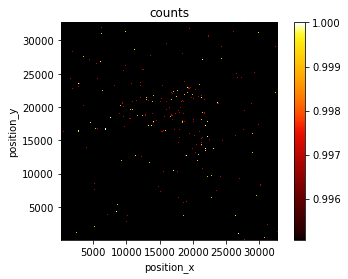

In [5]:
sp.render_2d_mpl(dat, bin_size=100, rescale='equal');

## A simple analysis procedure: localization precision

### Instantiation

Create an instance of the analysis class. By doing this you set all parameters in the parameter attribute. To start the actual computation you have to call instance.compute().

In [6]:
lp = sp.LocalizationPrecision(radius=50)

Each analysis class provides some attributes and methods for the most common interaction with the computed results.

In [7]:
attributes = [x for x in dir(lp) if not x.startswith('_')]
attributes

['compute',
 'count',
 'distribution_statistics',
 'fit_distributions',
 'hist',
 'meta',
 'parameter',
 'plot',
 'report',
 'results']

### The results attribute

A standard analysis class has an attribute *results* to hold the most fundamental results as number, numpy array or pandas series or dataframe. 

In [8]:
lp.compute(dat)
print('type of lpf.results: ', type(lp.results), '\n')
print(lp.results.head())

Processed frames:: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 46/46 [00:01<00:00, 35.08it/s]


type of lpf.results:  <class 'pandas.core.frame.DataFrame'> 

   position_delta_x  position_delta_y  position_distance  frame
0          4.599609         -2.800781           5.385237      0
1         -1.000000         -3.400391           3.544384      0
2         17.000000        -17.500000          24.397746      0
3          5.101562         -8.100586           9.573162      0
4        -14.099609         22.599609          26.637217      0


Results can be saved by specifying a path

In [11]:
from pathlib import Path
temp_directory = Path('.') / 'temp'
temp_directory.mkdir(parents=True, exist_ok=True)

path = temp_directory / 'results.txt'
path

WindowsPath('temp/results.txt')

and saving the data using numpy or pandas routines

In [12]:
lp.results.to_csv(path, sep='\t')

Delete the file an empty directory

In [13]:
path.unlink()
temp_directory.rmdir()

### A simple standardized plot

Most likely the results should be inspected by looking at a typical plot.
In this case the plot shows results smoothed by a running average according to the specified window.

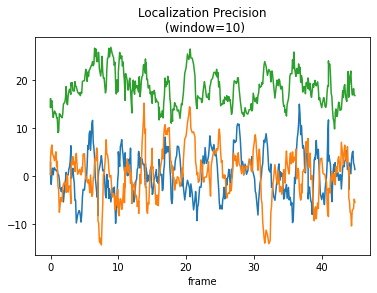

In [14]:
lp.plot(window=10);

For more advanced plotting schemes use the matplolip framework. So not forget to set show=False in the plot function. 

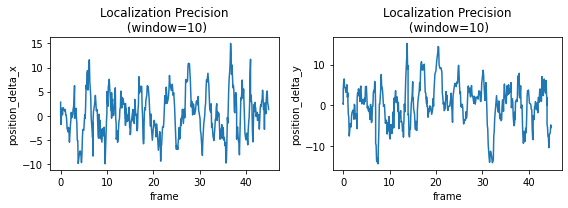

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3))
lp.plot(ax=ax[0], window=10, loc_property='position_delta_x')
lp.plot(ax=ax[1], window=10, loc_property='position_delta_y')
plt.tight_layout()
plt.show()

### A simple standardized histogram

Quite often the results are best presented as a histogram. The histogram for the distances per default includes a fit to a distribution expected for normal distributed localizations. Sigma is the localization precision.

The histogram per default provides automatic bins and is normalized to show a probability density function.

C:\Miniconda3\envs\smlm_analysis\lib\site-packages\scipy\stats\_distn_infrastructure.py:1797: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


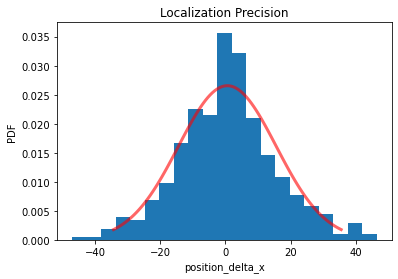

In [16]:
lp.hist(loc_property='position_delta_x');

Alternatively the position deltas can be histogrammed.

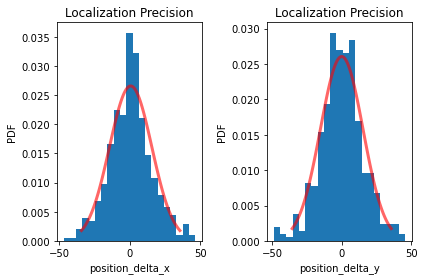

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2)
lp.hist(ax=ax[0], loc_property='position_delta_x')
lp.hist(ax=ax[1], loc_property='position_delta_y')
plt.tight_layout()
plt.show()

### Secondary results 

Secondary results are e.g. fit parameter derived from analyzing the distribution of *results* values. Secondary results are different for each analysis routine. They are included as additional attributes.

Localization precision can e.g. be derived from fitting the position distances to an appropriate distribution and estimating the sigma parameter.

In [18]:
lp.distribution_statistics.parameter_dict()

{'position_delta_x_loc': 0.5793574,
 'position_delta_x_scale': 15.016627,
 'position_delta_y_loc': -0.028082674,
 'position_delta_y_scale': 15.310259,
 'position_distance_sigma': 15.169726562500031,
 'position_distance_loc': 0,
 'position_distance_scale': 1}

In [19]:
print('position_distance_sigma: ', lp.distribution_statistics.parameter_dict()['position_distance_sigma'])

position_distance_sigma:  15.169726562500031


### Metadata

Each analysis class is supplied with meta data. The main purpose is to (i) capture methods and parameters that were supplied in each instantiation and (ii) provide information on the dataset on which the particular analysis was carried out. Metadata is structured using Protocoll Buffers.

In [20]:
lp.meta

identifier: "1"
creation_date: "2021-03-20 07:52:39 +0100"
method {
  name: "LocalizationPrecision"
  parameter: "{\'radius\': 50}"
}

You can add some user-defined key-value pairs:

In [21]:
lp.meta.map['some key'] = 'some value'
lp.meta.map

{'some key': 'some value'}

## Metadata can be used to rerun the analysis with the same parameter.

In [22]:
lp.meta.method.name

'LocalizationPrecision'

In [23]:
lp.meta.method.parameter

"{'radius': 50}"

In [24]:
import ast
import locan.analysis
params = ast.literal_eval(lp.meta.method.parameter)
print(params)
lp_2 = getattr(locan.analysis, lp.meta.method.name)(**params)
lp_2.compute(dat)
lp_2.results.head()

{'radius': 50}


Processed frames:: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 46/46 [00:01<00:00, 35.86it/s]


,position_delta_x,position_delta_y,position_distance,frame
0,4.599609,-2.800781,5.385237,0
1,-1.000000,-3.400391,3.544384,0
2,17.000000,-17.500000,24.397746,0
3,5.101562,-8.100586,9.573162,0
4,-14.099609,22.599609,26.637217,0
